<a href="https://colab.research.google.com/github/audrb1999/DL-Project/blob/main/01.numpy_XOR_%EA%B5%AC%ED%98%84/%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 기본기 1

##***기본적인 클래스 구현***
1. Layer
2. Step function
3. Perceptron

In [ ]:
class Layer:
    def __init__(self):# 모든 함수들이 공통으로 입출력을 조절
        self.input = None
        self.output = None
    
    def forward(self, x):# 모든 함수들이 공통으로 사용하는 순전파 
        self.input = x
        self.output = self._forward(x)
        return self.output

    def _forward(self, x):
        raise NotImplementedError


    

In [ ]:
import numpy as np

class StepFunction(Layer):
    def _forward(self, x):
        y = x > 0
        return y.astype(np.int)

class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__() # 만약 상위 클래스 Layer가 호출되지 않아도 실행할 수 있게하는 것
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def _forward(self, x): # 활성화 함수 유무를 위한 if 문
        a = np.matmul(x, self.weights) + self.bias
        if self.activation != None:
            y = self.activation.forward(a)
            return y
        return a


1. 퍼셉트론이 제대로 동작하는지 확인

In [ ]:
p = Perceptron(np.array([[1, 2], [3, 4]]), np.array([[5, 6]]))
p.forward(np.array([[0, 0], [1, 0], [0, 1]]))

array([[ 5,  6],
       [ 6,  8],
       [ 8, 10]])

2. 계단 함수가 제대로 동작하는지 확인

In [ ]:
s = StepFunction()
s.forward(np.array([1, -4, 3, 0]))

array([1, 0, 1, 0])

3. 퍼셉트론과 계단함수를 이용


In [ ]:
p = Perceptron(np.array([[1, -1], [-2, 0]]), np.array([[-3, 1]]), activation=s)
p.forward(np.array([[1, 2], [-3, -4]]))

array([[0, 0],
       [1, 1]])

##***MLP를 위한 Class 만들기***

In [ ]:
class Model(Layer):
    def __init__(self):
        super().__init__()
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def _forward(self, x):
        a = self.layers[0].forward(x)
        y = self.layers[1].forward(a)

        return y

In [ ]:
model = Model()

model.add(Perceptron(np.array([[1, 2], [1, 0]]), np.array([[-1, -2]])))
model.add(Perceptron(np.array([[-1, 1], [3, 1]]), np.array([[0, 1]])))
model.forward(np.array([[1, 1], [0, 0]]))

array([[-1,  2],
       [-5, -2]])

##And 게이트를 구현해보자 # 가중치만 건드려주면 된다!

In [ ]:
class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__() # 만약 상위 클래스 Layer가 호출되지 않아도 실행할 수 있게하는 것
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def _forward(self, x): # 활성화 함수 유무를 위한 if 문
        a = np.matmul(x, self.weights) + self.bias
        if self.activation != None:
            y = self.activation.forward(a)
            return y
        return a

class Model(Layer):
    def __init__(self):
        super().__init__()
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def _forward(self, x):
        y = self.layers[0].forward(x)

        return y


s = StepFunction()

model = Model()# 초기화
model.add(Perceptron(np.array([0.3, 0.3]), -0.5, s))
model.forward(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))



array([0, 0, 0, 1])

##***XOR 문제를 해결해보자***

In [ ]:
class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__() # 만약 상위 클래스 Layer가 호출되지 않아도 실행할 수 있게하는 것
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def _forward(self, x): # 활성화 함수 유무를 위한 if 문
        a = np.matmul(x, self.weights) + self.bias
        if self.activation != None:
            y = self.activation.forward(a)
            return y
        return a

class Model(Layer):
    def __init__(self):
        super().__init__()
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)


    def _forward(self, x):
        a = self.layers[0].forward(x)# 2층으로 연결해주기 위해서 이 출력을 다음 레이어가 받음
        c = self.layers[1].forward(x)
        y = []
        print('a값', len(a))# 4번 반복을 위해
        for i in range(len(a)):    
            z = Perceptron(np.array([0.3, 0.3]), -0.5, StepFunction()).forward(np.array([a[i], c[i]]))
            y.append(z)
            
        return y

In [ ]:
s = StepFunction()
model = Model()
model.add(Perceptron(np.array([0.3, 0.3]), -0.2, activation = s))# OR
model.add(Perceptron(np.array([-0.5, -0.5]), 0.8, s))# nand
model.forward(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))

a값 4


[0, 1, 1, 0]

##***Sigmoid를 만들어보자!***

In [ ]:
class Sigmoid(Layer):
    def _forward(self, x):
        return 1 / (1+np.exp(-x))

In [ ]:
>>> s = Sigmoid()
>>> s.forward(np.array([-2, -1, 0, 1, 2]))

array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708])

##***MSE(Loss function)을 만들어보자***

In [ ]:
class Loss:
    def forward(self, y_true, y_pred):
        raise NotImplementedError
   
    def _forward(self, y_true, y_pred):
        raise NotImplementedError

class MSE(Loss):
    def forward(self, y_true, y_pred):# forward를 상속받아서 고쳐쓴 것
        mse = np.mean(np.square(y_true - y_pred)/2, axis = 0, keepdims = True)# 1랭크가 되지 않도록 차원 유지!
        return mse

In [ ]:
mse = MSE()
mse.forward(np.array([1, 2, 3, 4]), np.array([0, 0, 0, 0]))

3.75

##***Sigmoid를 사용해서 xor을 구하고 loss값을 구하자!***

In [ ]:
class Model(Layer):
    def __init__(self):
        super().__init__()
        self.layers = []
        self.loss = None #loss값 초기화 이전 값이 있더라도 model()클래스 선언시 초기화됨!

    def add(self, layer):
        self.layers.append(layer)


    def _forward(self, x):
        a = self.layers[0].forward(x)# 2층으로 연결해주기 위해서 이 출력을 다음 레이어가 받음
        c = self.layers[1].forward(x)
        y = []
        for i in range(len(a)):    
            z = Perceptron(np.array([0.3, 0.3]), 0.1, StepFunction()).forward(np.array([a[i], c[i]]))
            y.append(z)
            
        return y

    def set_loss(self, loss):
        self.loss = loss

    def evaluate(self, x, y):
        if self.loss is None:
            return None
        y_pred = Sigmoid().forward(x)
        
        return self.loss.forward(y, y_pred)


In [ ]:
model = Model()
model.set_loss(MSE())
model.evaluate(np.random.normal(size=(4, 2)), np.ones((4, 2)))

0.2228071680105223

##***Layer sigmoid역전파 구현!***

In [ ]:
class Layer:
    def backward(self, grad = 1):
        if self.input is None or self.output is None:
            return None
        return self._backward(grad)

    def _backward(self, grad):
        raise NotImplementedError

class Sigmoid(Layer):
    def _forward(self, x):
        self.result = 1 / (1+np.exp(-x))
        return self.result

    def _backward(self, x): 
        result = self.result
        return result * (1 - result)


##***퍼셉트론에 backward구현***

In [ ]:
class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__() # 만약 상위 클래스 Layer가 호출되지 않아도 실행할 수 있게하는 것
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def _forward(self, x): # 활성화 함수 유무를 위한 if 문
        
        a = np.matmul(x, self.weights) + self.bias
        if self.activation != None:
            y = self.activation.forward(a)
            return y
        return a

    def _backward(self, grad):
        #grad 값이 없으면 grad = 1
        dw = self.input.T 
        db = np.sum(dz, axis = 0, keepdims=True)

        return dw, db

##***시그모이드 안쓰고 구현***

In [ ]:
class Sigmoid(Layer):
    def _forward(self, x):
        self.result = 1 / (1+np.exp(-x))
        return self.result

    def _backward(self): 
        result = self.result
        return result * (1 - result)

class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__() # 만약 상위 클래스 Layer가 호출되지 않아도 실행할 수 있게하는 것
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def _forward(self, x): # 활성화 함수 유무를 위한 if 문
        
        a = np.matmul(x, self.weights) + self.bias
        if self.activation != None:
            y = self.activation.forward(a)
            return y
        return a

    def _backward(self):
        da = self.activation.backward() 
        dw = self.input.T @ dz
        db = np.sum(dz, axis = 0, keepdims=True)

        return dw, db

In [ ]:
p = Perceptron(np.array([[1, 2], [3, -1]]), np.array([[-2, 0]]), activation=Sigmoid())
x = np.arange(14).reshape((7, 2)) / 10
p.forward(x)


array([[0.15446527, 0.47502081],
       [0.2890505 , 0.52497919],
       [0.47502081, 0.57444252],
       [0.66818777, 0.62245933],
       [0.81757448, 0.66818777],
       [0.90887704, 0.7109495 ],
       [0.95689275, 0.75026011]])

In [ ]:
print(p.backward())

TypeError: ignored

In [ ]:
print(g_w)
print()
print(g_b)

[[0.52551375 0.89637522]
 [0.63355475 1.05565494]]

[[1.08041001 1.59279716]]


##***Loss function 구현 역전파***

In [ ]:
class Loss:
    def forward(self, y_true, y_pred):
        raise NotImplementedError
   
    def _forward(self, y_true, y_pred):
        raise NotImplementedError

    def backward(self, y_ture, y_pred):
        raise NotImplementedError

class MSE(Loss):
    def forward(self, y_true, y_pred):# forward를 상속받아서 고쳐쓴 것
        mse = np.mean(np.square(y_true - y_pred)/2, axis = 0, keepdims = True)# 1랭크가 되지 않도록 차원 유지!
        return mse

    def backward(self, y_true, y_pred):
        grad = np.mean(y_pred - y_true, axis = 0, keepdims=True)# 평균, 차원 유지
        return grad

In [ ]:
mse = MSE()
mse.backward(np.array([1., 2., 3., 4.]), np.array([0., 0., 0., 0.]))#임의의 예측값과 답을 넣음

array([-2.5])

In [ ]:
mse.backward(np.array([[1., 2.], [3., 4.]]), np.array([[0., 0.], [0., 0.]]))

array([[-2., -3.]])

In [ ]:
k = mse.backward(np.random.normal(size=(3, 8, 8)), np.random.normal(size=(3, 8, 8)))
k.shape

(1, 8, 8)

##. Back propgation

In [ ]:
import numpy as np

class Layer:
    def __init__(self):# 모든 함수들이 공통으로 입출력을 조절
        self.input = None
        self.output = None
        
    
    def forward(self, x):# 모든 함수들이 공통으로 사용하는 순전파 
        self.input = x
        self.output = self._forward(x)
        return self.output


    def _forward(self, x):
        raise NotImplementedError


    def backward(self, grad = 1):
        if self.input is None or self.output is None:
            return None
        return self._backward(grad)

    def _backward(self, grad):
        raise NotImplementedError


class Sigmoid(Layer):
    def _forward(self, x):
        return 1/(1+np.exp(-x))

    def _backward(self,z): 
        return z * (1 - z)


class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__() # 만약 상위 클래스 Layer가 호출되지 않아도 실행할 수 있게하는 것
        self.weights = weights
        self.bias = bias
        self.activation = activation
        self.z = None

    def _forward(self, x): # 활성화 함수 유무를 위한 if 문
        self.z = x @ self.weights + self.bias
        if self.activation != None:
            self.a = self.activation.forward(self.z)
            return self.a
        return self.z


class Model(Layer):
    def __init__(self):
        super().__init__()
        self.layers = []
        self.loss = None #loss값 초기화 이전 값이 있더라도 model()클래스 선언시 초기화됨!

    def add(self, layer):
        self.layers.append(layer)


    def _forward(self, x):

        self.a1 = self.layers[0].forward(x)# 2층으로 연결해주기 위해서 이 출력을 다음 레이어가 받음
        self.a2 = self.layers[1].forward(self.a1)
            
        return self.a2


    def set_loss(self, loss):
        self.loss = loss

    def evaluate(self, x, y):
        if self.loss is None:
            return None
        y_pred = Sigmoid().forward(x)
        
        return self.loss.forward(y, y_pred)

    
    def _backward(self, grad): # a2 = y, a1 = dz 
        
        self.grad = grad # dl / da2
        # dl/da2 * da2/dz2(시그모이드 역전파(self.layers[1].a))
        # dl/da2는 axis = 0으로 sum 해주어서 브로드캐스팅을 사용하기 위해 일반 곱을 사용
        self.dz2 = self.grad * self.layers[1].activation.backward(self.layers[1].a)# dl/da2 * da2/dz2 (4, 2)
        self.db2 = np.sum(self.dz2, axis = 0, keepdims= True)# (dz2/db2)1 * dl/dz2 덧셈 노드라 그냥 전달(1, 2)
        self.dw2 = self.layers[0].a.T @ self.dz2 # a1으로 w2 값 구하고  dz2/dw2 * da2/dz2 (5, 4) (4, 2) = (5, 2)
        

        # dl/dz2 * dz2/da1 * da1/dz1   
        self.dz1 =  self.layers[0].activation.backward(self.dz2 @ self.layers[1].weights.T)  #(4, 2) (2, 5) (4, 5) 행렬곱으로는 맞춰줄 수 없어 방법 변경
        self.dw1 = self.input.T @ self.dz1 # (3, 4)
        self.db1 = np.sum(self.dz1, axis = 0, keepdims= True)
       
        return [[self.db1, self.db2], [self.dw1, self.dw2]]



class Loss:
    def forward(self, y_true, y_pred):
        raise NotImplementedError
   
    def _forward(self, y_true, y_pred):
        raise NotImplementedError

    def backward(self, y_ture, y_pred):
        raise NotImplementedError
        

class MSE(Loss):
    def forward(self, y_true, y_pred):# forward를 상속받아서 고쳐쓴 것
        mse = np.mean(np.square(y_true - y_pred)/2, axis = 0, keepdims = True)# 1랭크가 되지 않도록 차원 유지!
        return mse

    def backward(self, y_true, y_pred):
        grad = np.mean(y_true - y_pred, axis = 0, keepdims=True)# 평균, 차원 유지
        return grad


In [ ]:
_# 2 층 순전파
model = Model()
model.add(Perceptron(np.random.normal(size=(3, 5)), np.random.normal(size=(1, 5)), activation=Sigmoid()))
model.add(Perceptron(np.random.normal(size=(5, 2)), np.random.normal(size=(1, 2)), activation=Sigmoid()))
model.forward(np.ones((4, 3)))

array([[0.37599948, 0.33568898],
       [0.37599948, 0.33568898],
       [0.37599948, 0.33568898],
       [0.37599948, 0.33568898]])

In [ ]:
grads = model.backward()

b, w = grads

print(w[0].shape, w[1].shape)

(3, 5) (5, 2)


In [ ]:
model.layers[1].a.T 

array([[0.84656494, 0.84656494, 0.84656494, 0.84656494],
       [0.77027398, 0.77027398, 0.77027398, 0.77027398]])

## 가중치 업데이트

In [ ]:
class Layer:
    def __init__(self):# 모든 함수들이 공통으로 입출력을 조절
        self.input = None
        self.output = None
        
    
    def forward(self, x):# 모든 함수들이 공통으로 사용하는 순전파 
        self.input = x
        self.output = self._forward(x)
        return self.output


    def _forward(self, x):
        raise NotImplementedError


    def backward(self, grad = 1):
        if self.input is None or self.output is None:
            return None
        return self._backward(grad)

    def _backward(self, grad):
        raise NotImplementedError


class Sigmoid(Layer):
    def _forward(self, x):
        return 1/(1+np.exp(-x))

    def _backward(self,z): 
        return z * (1 - z)


class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__() # 만약 상위 클래스 Layer가 호출되지 않아도 실행할 수 있게하는 것
        self.weights = weights
        self.bias = bias
        self.activation = activation
        self.z = None

    def _forward(self, x): # 활성화 함수 유무를 위한 if 문
        self.z = x @ self.weights + self.bias
        if self.activation != None:
            self.a = self.activation.forward(self.z)
            return self.a
        return self.z


class Model(Layer):
    def __init__(self, lr = 1e-3):
        super().__init__()
        self.layers = []
        self.loss = None #loss값 초기화 이전 값이 있더라도 model()클래스 선언시 초기화됨!
        self.lr = lr

    def add(self, layer):
        self.layers.append(layer)


    def _forward(self, x):

        self.a1 = self.layers[0].forward(x)# 2층으로 연결해주기 위해서 이 출력을 다음 레이어가 받음
        self.a2 = self.layers[1].forward(self.a1)
            
        return self.a2


    def set_loss(self, loss):
        self.loss = loss

    def evaluate(self, x, y):
        if self.loss is None:
            return None
        y_pred = Sigmoid().forward(x)
        
        return self.loss.forward(y, y_pred)


    def _backward(self, grad): # a2 = y, a1 = dz 
        
        self.grad = grad # dl / da2
        # dl/da2 * da2/dz2(시그모이드 역전파(self.layers[1].a))
        # dl/da2는 axis = 0으로 sum 해주어서 브로드캐스팅을 사용하기 위해 일반 곱을 사용
        self.dz2 = self.grad * self.layers[1].activation.backward(self.layers[1].a)# dl/da2 * da2/dz2 (4, 2)
        self.db2 = np.sum(self.dz2, axis = 0, keepdims= True)# (dz2/db2)1 * dl/dz2 덧셈 노드라 그냥 전달(1, 2)
        self.dw2 = self.layers[0].a.T @ self.dz2 # a1으로 w2 값 구하고  dz2/dw2 * da2/dz2 (5, 4) (4, 2) = (5, 2)
        

        # dl/dz2 * dz2/da1 * da1/dz1   
        self.dz1 =  self.layers[0].activation.backward(self.dz2 @ self.layers[1].weights.T)  #(4, 2) (2, 5) (4, 5)
        self.dw1 = self.input.T @ self.dz1 # (3, 4)
        self.db1 = np.sum(self.dz1, axis = 0, keepdims= True)
       
        return [[self.db1, self.db2], [self.dw1, self.dw2]]

    def update(self, grads):
        
        b, w = grads

        self.layers[0].weights -= w[0] * self.lr
        self.layers[1].weights -= w[1] * self.lr
        self.layers[0].bias -= b[0] + self.lr
        self.layers[1].bias -= b[1] * self.lr

        



In [ ]:
model = Model()
model.add(Perceptron(np.random.normal(size=(3, 5)), np.random.normal(size=(1, 5)), activation=Sigmoid()))
model.add(Perceptron(np.random.normal(size=(5, 2)), np.random.normal(size=(1, 2)), activation=Sigmoid()))
model.lr = 1e-3
model.forward(np.random.normal(size=(4, 3)))
grads = model.backward()
# 갱신 전
print(model.layers[0].weights)
print(model.layers[1].weights)
print(model.layers[0].bias )
print(model.layers[1].bias)

model.update(grads)


# 갱신 후
print('갱신 후')
print(model.layers[0].weights)
print(model.layers[1].weights)
print(model.layers[0].bias )
print(model.layers[1].bias)


[[-0.80444546 -0.09864425  1.22167714 -1.84819749  0.13947525]
 [-0.46925474  0.13131593  0.01688424  1.31549757  0.31561143]
 [ 1.27558382 -0.08471281  0.52111704  0.59170133  1.12217941]]
[[-1.38177342  0.04013651]
 [ 0.06273464 -1.16851579]
 [ 1.343578   -3.22086696]
 [ 0.08159677 -1.43991148]
 [-0.66887452  0.82060609]]
[[-0.7886963  -0.45249229  0.261665    0.43971072  1.02026515]]
[[-0.37223273  1.0588857 ]]
갱신 후
[[-0.80526485 -0.09921815  1.22066411 -1.84893067  0.13951008]
 [-0.4690221   0.13129008  0.01658335  1.31545817  0.31569122]
 [ 1.27520083 -0.08503966  0.520487    0.59128133  1.12223287]]
[[-1.38210193  0.03986673]
 [ 0.06237703 -1.16881068]
 [ 1.34324211 -3.2211255 ]
 [ 0.08096765 -1.44040337]
 [-0.66942663  0.82016544]]
[[0.7249716  0.49554672 1.8219941  1.64981106 1.01674288]]
[[-0.37310033  1.05816795]]


## Model 트레이닝

In [ ]:
import numpy as np

class Layer:
    def __init__(self):# 모든 함수들이 공통으로 입출력을 조절
        self.input = None
        self.output = None
        
    
    def forward(self, x):# 모든 함수들이 공통으로 사용하는 순전파 
        self.input = x
        self.output = self._forward(x)
        return self.output


    def _forward(self, x):
        raise NotImplementedError


    def backward(self, grad = 1):
        if self.input is None or self.output is None:
            return None
        return self._backward(grad)

    def _backward(self, grad):
        raise NotImplementedError

class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__() # 만약 상위 클래스 Layer가 호출되지 않아도 실행할 수 있게하는 것
        self.weights = weights
        self.bias = bias
        self.activation = activation
        self.z = None

    def _forward(self, x): # 활성화 함수 유무를 위한 if 문
        self.z = x @ self.weights + self.bias
        if self.activation != None:
            self.a = self.activation.forward(self.z)
            return self.a
        return self.z


class Sigmoid(Layer):
    def _forward(self, x):
        return 1/(1+np.exp(-x))

    def _backward(self,z): 
        return z * (1 - z)

class Loss:
    def forward(self, y_true, y_pred):
        raise NotImplementedError
   
    def _forward(self, y_true, y_pred):
        raise NotImplementedError

    def backward(self, y_ture, y_pred):
        raise NotImplementedError
        

class MSE(Loss):
    def forward(self, y_true, y_pred):# forward를 상속받아서 고쳐쓴 것
        mse = 0.5 * np.mean(np.square(y_true - y_pred) , axis = 0, keepdims = True)# 1랭크가 되지 않도록 차원 유지!
        return mse

    def backward(self, y_true, y_pred):
        grad = 2 * np.mean(y_pred - y_true, axis = 0, keepdims=True)# 평균, 차원 유지
        return grad


class Sigmoid(Layer):
    def _forward(self, x):
        return 1/(1+np.exp(-x))

    def _backward(self,z): 
        return z * (1 - z)


class Model(Layer):
    def __init__(self, lr = 1e-3):
        super().__init__()
        self.layers = []
        self.loss = None #loss값 초기화 이전 값이 있더라도 model()클래스 선언시 초기화됨!
        self.lr = lr

    def add(self, layer):
        self.layers.append(layer)


    def _forward(self, x):

        self.a1 = self.layers[0].forward(x)# 2층으로 연결해주기 위해서 이 출력을 다음 레이어가 받음
        self.a2 = self.layers[1].forward(self.a1)
            
        return self.a2


    def set_loss(self, loss):
        self.loss = loss

    def evaluate(self, x, y):
        if self.loss is None:
            return None
        y_pred = Sigmoid().forward(x)
        
        return self.loss.forward(y, y_pred)

    
    def _backward(self, grad): # a2 = y, a1 = dz 
        
        self.grad = grad # dl / da2
        # dl/da2 * da2/dz2(시그모이드 역전파(self.layers[1].a))
        # dl/da2는 axis = 0으로 sum 해주어서 브로드캐스팅을 사용하기 위해 일반 곱을 사용
        self.dz2 = self.grad * self.layers[1].activation.backward(self.layers[1].a)# dl/da2 * da2/dz2 (4, 2)
        self.db2 = np.sum(self.dz2, axis = 0, keepdims= True)# (dz2/db2)1 * dl/dz2 덧셈 노드라 그냥 전달(1, 2)
        self.dw2 = self.layers[0].a.T @ self.dz2 # a1으로 w2 값 구하고  dz2/dw2 * da2/dz2 (5, 4) (4, 2) = (5, 2)
        

        # dl/dz2 * dz2/da1 * da1/dz1   
        self.dz1 =  self.layers[0].activation.backward(self.dz2 @ self.layers[1].weights.T)  #(4, 2) (2, 5) (4, 5)
        self.dw1 = self.input.T @ self.dz1 # (3, 4)
        self.db1 = np.sum(self.dz1, axis = 0, keepdims= True)
       
        return [[self.db1, self.db2], [self.dw1, self.dw2]]
        
        b, w = grads

        self.layers[0].weights -= w[0] * self.lr
        self.layers[1].weights -= w[1] * self.lr
        self.layers[0].bias -= b[0] + self.lr
        self.layers[1].bias -= b[1] * self.lr


    def update(self, grads):
        
        b, w = grads

        self.layers[0].weights -= w[0] * self.lr
        self.layers[1].weights -= w[1] * self.lr
        self.layers[0].bias -= b[0] + self.lr
        self.layers[1].bias -= b[1] * self.lr


    def train_once(self, x, y):
        y_pred = self.forward(x)
        loss = self.loss.backward(y, y_pred)
        grads = self.backward()
        self.update(grads)



In [ ]:
>>> model = Model()
>>> model.add(Perceptron(np.random.normal(size=(3, 5)), np.random.normal(size=(1, 5)), activation=Sigmoid()))
>>> model.add(Perceptron(np.random.normal(size=(5, 3)), np.random.normal(size=(1, 3)), activation=Sigmoid()))
>>> model.set_loss(MSE())
>>> model.lr = 1e-3

In [ ]:
for i in range(10000):
    x = np.random.normal(size=(4, 3))
    y = -0.5 * x
    model.train_once(x, y)

x = np.random.normal(size=(10, 3))
y = -0.5 * x
model.evaluate(x, y)

"""    def update(self, grads):
        
        b, w = grads

        self.layers[0].weights -= w[0] * self.lr
        self.layers[1].weights -= w[1] * self.lr
        self.layers[0].bias -= b[0] + self.lr
        self.layers[1].bias -= b[1] * self.lr"""


[[1.00000000e+000 6.26310965e-118 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [1.00000000e+000 7.19037260e-117 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [1.00000000e+000 7.82750444e-117 1.00000000e+000 1.00000000e+000
  1.00000000e+000]
 [1.00000000e+000 3.08829742e-117 1.00000000e+000 1.00000000e+000
  1.00000000e+000]]


In [ ]:
for i in range(10000):
    x = np.random.normal(size=(10, 3))
    y = -0.5 * x
    model.train_once(x, y)

x = np.random.normal(size=(10, 3))
y = -0.5 * x
model.evaluate(x, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in exp


array([[0.25809517, 0.07422035, 0.26211177]])

## 실제 xor 학습을 해보자 - 1차 시도

In [ ]:
import numpy as np

class Layer:
    def __init__(self):# 모든 함수들이 공통으로 입출력을 조절
        self.input = None
        self.output = None
        
    
    def forward(self, x):# 모든 함수들이 공통으로 사용하는 순전파 
        self.input = x
        self.output = self._forward(x)
        return self.output


    def _forward(self, x):
        raise NotImplementedError


    def backward(self, grad = 1):
        if self.input is None or self.output is None:
            return None
        return self._backward(grad)

    def _backward(self, grad):
        raise NotImplementedError

class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__() # 만약 상위 클래스 Layer가 호출되지 않아도 실행할 수 있게하는 것
        self.weights = weights
        self.bias = bias
        self.activation = activation

    def _forward(self, x): # 활성화 함수 유무를 위한 if 문
        self.z = x @ self.weights + self.bias
        if self.activation != None:
            self.a = self.activation.forward(self.z)
            return self.a
        return self.z

class Loss:
    def forward(self, y_true, y_pred):
        raise NotImplementedError
   
    def _forward(self, y_true, y_pred):
        raise NotImplementedError

    def backward(self, y_ture, y_pred):
        raise NotImplementedError

        

class MSE(Loss):
    def __init__(self):
        super().__init__()

    def forward(self, y_true, y_pred):# forward를 상속받아서 고쳐쓴 것
        self.mse = 0.5 * np.mean(np.square(y_pred - y_true) , axis = 0, keepdims = True)# 1랭크가 되지 않도록 차원 유지!
        return self.mse

    def backward(self, y_true, y_pred):
        self.grad =  np.mean(y_pred - y_true, axis = 0, keepdims=True)# 평균, 차원 유지
        return self.grad


class Sigmoid(Layer):
    def _forward(self, x):
        return 1/(1+np.exp(-x))

    def _backward(self,z): 
        return z * (1 - z)


class Model(Layer):
    def __init__(self, lr = 0.001):
        super().__init__()
        self.layers = []
        self.loss = None #loss값 초기화 이전 값이 있더라도 model()클래스 선언시 초기화됨!
        self.lr = lr

    def add(self, layer):
        self.layers.append(layer)


    def _forward(self, x):
   
        self.a1 = self.layers[0].forward(x)# 2층으로 연결해주기 위해서 이 출력을 다음 레이어가 받음
        self.a2 = self.layers[1].forward(self.a1)
            
        return self.a2
        
    def set_node(self):
        self.W1 = self.layers[0].weight
        self.b1 = self.layers[0].bias
        self.layers[0].weight = self.W1
        self.layers[0].bias = self.b1
        self.z1 = np.dot(self.x,self.W1)+self.b1
        self.s1 = self.layers[0].activation.forward(self.z1)


        self.W2 = self.layers[1].weight
        self.b2 = self.layers[1].bias
        self.layers[1].weight = self.W2
        self.layers[1].bias = self.b2
        self.z2 = np.dot(self.s1,self.W2)+self.b2
        self.s2 = self.layers[1].activation.forward(self.z2)


    def set_loss(self, loss):
        self.loss = loss

    def evaluate(self, x, y):
        if self.loss is None:
            return None
        y_pred = Sigmoid().forward(x)
        
        return self.loss.forward(y, y_pred)

    
    def _backward(self, grad): # a2 = y, a1 = dz 
        
        self.grad = grad # dl / da2
        # dl/da2 * da2/dz2(시그모이드 역전파(self.layers[1].a))
        # dl/da2는 axis = 0으로 sum 해주어서 브로드캐스팅을 사용하기 위해 일반 곱을 사용
        self.dz2 = self.grad * self.layers[1].activation.backward(self.layers[1].a)# dl/da2 * da2/dz2 (4, 1)
        self.db2 = 1./ 4. * np.sum(self.dz2, axis = 0, keepdims= True)# (dz2/db2)1 * dl/dz2 덧셈 노드라 그냥 전달(1, 1)
        self.dw2 = self.layers[0].a.T @ self.dz2 # a1으로 w2 값 구하고  dz2/dw2 * da2/dz2 (8, 4) (4, 1) = (8, 1)
        
        
        #print(f'dz2{self.dz2.shape}, w2{self.layers[1].weights.T.shape}, z1{self.layers[0].activation.backward(self.a1).shape}')
        # dl/dz2 * dz2/da1 * da1/dz1   
        self.dz1 =  self.dz2 @ self.layers[1].weights.T * self.layers[0].activation.backward(self.a1)  #(4, 1) (1, 8) (4, 8)
        self.dw1 = self.input.T @ self.dz1 # (2, 4) @ (4, 8) = (2, 8)
        self.db1 = 1./4.*np.sum(self.dz1, axis = 0, keepdims= True)
       
        return [[self.db1, self.db2], [self.dw1, self.dw2]]
        

    def update(self):
        # 한번만 되고 계속 같은값이 나온 이유는 갱신이 안되서

        self.layers[0].weights -= self.dw1 * self.lr
        self.layers[1].weights -= self.dw2 * self.lr
        self.layers[0].bias -= self.db1 + self.lr
        self.layers[1].bias -= self.db2 * self.lr

        return [self.layers[0].weights, self.layers[1].weights, self.layers[0].bias, self.layers[1].bias]
        


    def train_once(self, x, y):
        self.y_pred = self.forward(x)
        loss = self.loss.backward(y, self.y_pred)
        self.backward(loss)
        self.update() 
    
    def train(self, x, y, batch_size = 1, epochs = 1, interval = 1):
        self.loss_trace = []
        for i in range(epochs):
            self.train_once(x, y)
            if i % interval == 0:
                self.loss_trace.append(self.loss.forward(y, self.y_pred).reshape(1))
                print(self.loss.forward(y, self.y_pred))




def create_xor_dataset():
    return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0]).reshape(4, 1)

In [ ]:
np.random.seed(seed=100)
model = Model()
model.add(Perceptron(np.random.normal(size=(2, 8)), np.random.normal(size=(1, 8)), activation=Sigmoid()))
model.add(Perceptron(np.random.normal(size=(8, 1)), np.random.normal(size=(1, 1)), activation=Sigmoid()))
model.set_loss(MSE())
model.lr = 0.1
x_data, y_data = create_xor_dataset()# x = (4, 2)
model.train(x_data, y_data, batch_size=1, epochs=1000, interval=10)
z =  model.forward(x_data)



# 학습 2차 시도

In [ ]:
import numpy as np

class Layer:
    def __init__(self):# 모든 함수들이 공통으로 입출력을 조절
        self.input = None
        self.output = None
        
    
    def forward(self, x):# 모든 함수들이 공통으로 사용하는 순전파 
        self.input = x
        self.output = self._forward(x)
        return self.output


    def _forward(self, x):
        raise NotImplementedError


    def backward(self, grad = 1):
        if self.input is None or self.output is None:
            return None
        return self._backward(grad)

    def _backward(self, grad):
        raise NotImplementedError

class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__()
        self.weights = weights  # (in, out)
        self.bias = bias  # (1, out)
        self.activation = activation
        # print(self.weights,self.bias)


    def _forward(self, x):
        y = np.matmul(x, self.weights) + self.bias  # (N, out)
        if self.activation is None:
            return y
        y = self.activation.forward(y)
        return y


    def _backward(self, grad):
        if self.activation is None:
            grad_w = (
                np.matmul(np.transpose(self.input), grad) / self.input.shape[0]
            )  # (in, out)
            grad_b = np.mean(grad, axis=0, keepdims=True)  # (1, out)
            return grad_w, grad_b
        grad_a = self.activation.backward(grad)  # (N, out)
        grad_w = (
            np.matmul(np.transpose(self.input), grad_a) / self.input.shape[0]
        )  # (in, out)
        grad_b = np.mean(grad_a, axis=0, keepdims=True)  # (1, out)
        grad_next = np.matmul(grad_a, np.transpose(self.weights))  # (N, in)
        return (grad_w, grad_b), grad_next

    def update(self, grads):
        grad_w, grad_b = grads
        self.weights -= grad_w
        self.bias -= grad_b

class Loss:
    def forward(self, y_true, y_pred):
        raise NotImplementedError
   
    def _forward(self, y_true, y_pred):
        raise NotImplementedError

    def backward(self, y_ture, y_pred):
        raise NotImplementedError

        

class MSE(Loss):
    def __init__(self):
        super().__init__()

    def forward(self, y_true, y_pred):# forward를 상속받아서 고쳐쓴 것
        self.mse = 0.5 * np.mean(np.square(y_pred - y_true) , axis = 0, keepdims = True)# 1랭크가 되지 않도록 차원 유지!
        return self.mse

    def backward(self, y_true, y_pred):
        self.grad = np.mean(y_pred - y_true, axis = 0, keepdims=True)# 평균, 차원 유지
        return self.grad


class Sigmoid(Layer):
    def __init__(self):
        super().__init__()
    def _forward(self, x):
        return 1/(1+np.exp(-x))

    def _backward(self, grad):
        return grad * self.output * (1 - self.output)  # (N, out)

class Model(Layer):
    def __init__(self, lr = 0.001):
        super().__init__()
        self.layers = []
        self.loss = None #loss값 초기화 이전 값이 있더라도 model()클래스 선언시 초기화됨!
        self.lr = lr

    def add(self, layer):
        self.layers.append(layer)


    def _forward(self, x):
        print(self.layers)
        for layer in self.layers:
            x = layer.forward(x)
        return x
        

    def set_loss(self, loss):
        self.loss = loss

    def evaluate(self, x, y):
        if self.loss is None:
            return None
        return self.loss.forward(y, self.forward(x))

    
    def _backward(self, grad):
        grads = []
        layer_reversed = self.layers.copy()
        layer_reversed.reverse()
        for layer in layer_reversed:
            layer_grad, next_grad = layer.backward(grad)
            grad = next_grad
            grads.append((layer, layer_grad))
        return grads


    def update(self, grads):
        for idx, grad_layer in enumerate(grads):
            layer, grad = grad_layer
            grad_w, grad_b = grad
            update_grad = (grad_w * self.lr, grad_b * self.lr)
            layer.update(update_grad)


    def train_once(self, x, y):
        logit = self.forward(x)
        dout = self.loss.backward(y, logit)
        grads = self.backward(dout)
        self.update(grads)


    def train(self, x, y, batch_size=1, epochs=100000, interval=1000):
        def batch_generator(x, y, batch_size):
            i = 0
            while i < len(x):
                batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                yield batch, y_batch
                i += batch_size


        epoch = 0
        self.loss_trace = []
        while epoch < epochs:
            gen = batch_generator(x, y, batch_size)
            try:
                while 1:
                    batch, y_batch = next(gen)
                    logit_batch = self.forward(batch)
                    dout = self.loss.backward(y_batch, logit_batch)
                    grads = self.backward(dout)
                    self.update(grads)
            except StopIteration:
                if not (epoch % interval):
                    print(np.mean(self.evaluate(x, y)))
                    self.loss_trace.append(np.mean(self.evaluate(x, y)))
                epoch += 1
                # print(epoch)



def create_xor_dataset():
    return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0]).reshape(4, 1)

In [ ]:
>>> model = Model()
>>> model.add(Perceptron(np.random.normal(size=(3, 5)), np.random.normal(size=(1, 5)), activation=Sigmoid()))
>>> model.add(Perceptron(np.random.normal(size=(5, 3)), np.random.normal(size=(1, 3)), activation=Sigmoid()))
>>> model.add(Perceptron(np.random.normal(size=(3, 3)), np.random.normal(size=(1, 3)), activation=Sigmoid()))
>>> model.add(Perceptron(np.random.normal(size=(3, 1)), np.random.normal(size=(1, 1)), activation=MSE()))
>>> model.train(x_train, y_train, batch_size=20, epochs=1000)
>>> model.evaluate(x_test, y_test)

TypeError: ignored

3차 시도

In [ ]:
import numpy as np
from numpy.lib.function_base import bartlett




class Layer:
    def __init__(self):
        self.inputs = None
        self.outputs = None


    def forward(self, x):
        self.inputs = x
        self.outputs = self._forward(x)
        return self.outputs


    def _forward(self, x):
        raise NotImplementedError


    def backward(self, grad=1.0):
        if self.inputs is None or self.outputs is None:
            return None
        return self._backward(grad)


    def _backward(self, grad):
        raise NotImplementedError


    def update(self, grads):
        raise NotImplementedError



class Sigmoid(Layer):
    def __init__(self):
        super().__init__()


    def _forward(self, x):
        return 1 / (1 + np.exp(-x))


    def _backward(self, grad):
        return grad * self.outputs * (1 - self.outputs)  # (N, out)



class Perceptron(Layer):
    def __init__(self, weights, bias, activation=None):
        super().__init__()
        self.weights = weights  # (in, out)
        self.bias = bias  # (1, out)
        self.activation = activation
        # print(self.weights,self.bias)


    def _forward(self, x):
        y = np.matmul(x, self.weights) + self.bias  # (N, out)
        if self.activation is None:
            return y
        y = self.activation.forward(y)
        return y


    def _backward(self, grad):
        if self.activation is None:
            grad_w = (
                np.matmul(np.transpose(self.inputs), grad) / self.inputs.shape[0]
            )  # (in, out)
            grad_b = np.mean(grad, axis=0, keepdims=True)  # (1, out)
            return grad_w, grad_b
        grad_a = self.activation.backward(grad)  # (N, out)
        grad_w = (
            np.matmul(np.transpose(self.inputs), grad_a) / self.inputs.shape[0]
        )  # (in, out)
        grad_b = np.mean(grad_a, axis=0, keepdims=True)  # (1, out)
        grad_next = np.matmul(grad_a, np.transpose(self.weights))  # (N, in)
        return (grad_w, grad_b), grad_next


    def update(self, grads):
        grad_w, grad_b = grads
        self.weights -= grad_w
        self.bias -= grad_b



class StepFunction(Layer):
    def __init__(self):
        super().__init__()


    def _forward(self, x):
        y = np.where(x > 0, True, False)
        return y.astype(np.int)



W = np.array([[1.0, 2.0], [3.0, 4.0]])
b = np.array([[5.0, 6.0]])



X_train = np.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0]])
p = Perceptron(W, b)



class Model(Layer):
    def __init__(self, lr=1e-3):
        super().__init__()
        self.layers = []
        self.lr = lr


    def add(self, layer):
        self.layers.append(layer)


    def _forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x


    def set_loss(self, loss):
        self.loss = loss


    def evaluate(self, x, y):
        if self.loss is None:
            return None
        return self.loss.forward(y, self.forward(x))


    def _backward(self, grad):
        grads = []
        layer_reversed = self.layers.copy()
        layer_reversed.reverse()
        for layer in layer_reversed:
            layer_grad, next_grad = layer.backward(grad)
            grad = next_grad
            grads.append((layer, layer_grad))
        return grads


    def update(self, grads):
        for idx, grad_layer in enumerate(grads):
            layer, grad = grad_layer
            grad_w, grad_b = grad
            update_grad = (grad_w * self.lr, grad_b * self.lr)
            layer.update(update_grad)


    def train_once(self, x, y):
        logit = self.forward(x)
        dout = self.loss.backward(y, logit)
        grads = self.backward(dout)
        self.update(grads)


    def train(self, x, y, batch_size=1, epochs=100000, interval=1000):
        def batch_generator(x, y, batch_size):
            i = 0
            while i < len(x):
                batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                yield batch, y_batch
                i += batch_size


        epoch = 0
        while epoch < epochs:
            gen = batch_generator(x, y, batch_size)
            try:
                while 1:
                    batch, y_batch = next(gen)
                    logit_batch = self.forward(batch)
                    dout = self.loss.backward(y_batch, logit_batch)
                    grads = self.backward(dout)
                    self.update(grads)
            except StopIteration:
                if not (epoch % interval):
                    print(np.mean(self.evaluate(x, y)))
                epoch += 1
                # print(epoch)
                



def create_xor_dataset():
    return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0])


In [ ]:
np.random.seed(seed=100)
model = Model()
model.add(Perceptron(np.random.normal(size=(2, 8)), np.random.normal(size=(1, 8)), activation=Sigmoid()))
model.add(Perceptron(np.random.normal(size=(8, 1)), np.random.normal(size=(1, 1)), activation=Sigmoid()))
model.set_loss(MSE())
model.lr = 0.1
x_data, y_data = create_xor_dataset()# x = (4, 2)
model.train(x_data, y_data, batch_size=1, epochs=100000, interval=100)
z =  model.forward(x_data)

0.12702695724262836
0.1227572217886189
0.12122594784405295
0.11957729964027171
0.11764914991339444
0.11528578043703269
0.11231120614473944
0.10850888888669914
0.10361179263356814
0.09732512381693842
0.08942064523097008
0.07991949720899465
0.06927406686423067
0.05834832621650844
0.0481065620247907
0.039230149965129565
0.03196270569579714
0.02621184098277541
0.021730178935906858
0.01824565489108999
0.015521136647587221
0.01336962639051943
0.011650291127653561
0.010259064792651791
0.009119399681135894
0.008174800285321363
0.007383250396701379
0.006713192756118619
0.006140667007436379
0.005647277139643201
0.005218742849426684
0.004843859924274323
0.004513747630559785
0.004221298604027396
0.003960772718151457
0.0037274942263593727
0.003517623679730228
0.0033279845067507936
0.0031559299347649183
0.002999239964187574
0.0028560409349836953
0.0027247422264478098
0.0026039860601911454


KeyboardInterrupt: ignored

In [ ]:
model.forward(x_data)

array([[0.00652213],
       [0.99176725],
       [0.98964205],
       [0.01137146]])

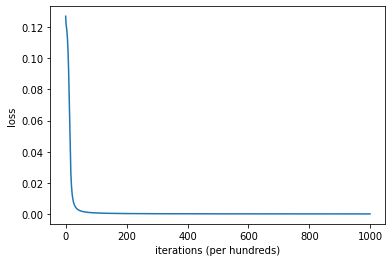

In [ ]:
import matplotlib.pyplot as plt

# Plot learning curve (with costs)
plt.plot(model.loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()

In [ ]:
s = np.array([[0.5], [0.5] , [0.5], [0.5]])
y = np.array([[0], [1] , [1], [0]])
delta=0.001

z = -np.sum(y*np.log(s+delta)+(1-y)*np.log(1-s+delta))

print(z)


2.764596711589089


##다른답

In [ ]:
class Layer(object):
    def __init__(self):
        self.input = None
        self.output = None
    
    def forward(self,x):
        self.input = x
        self.output = self._forward(x)
        return self.output
    
    def _forward(self,x):
        raise NotImplementedError


    def backward(self,x=None):
        return self._backward(x)


    def _backward(self,x=None):
        raise NotImplementedError


class Perceptron(object):
    def __init__(self,weight,bias,activation=None):
        self.weight = weight
        self.bias = bias
        self.activation = activation


class MSE(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self,s,y):
        m = len(x)
        return (1/2)*np.sum((s-y)**2)


    def backward(self,s,y):
        m = len(x)
        return (s-y)


class CRE(Layer):
    def __init__(self):
        super().__init__()
    def forward(self,s,y):
        delta = 0.001
        return -np.sum(y*np.log(s+delta)+(1-y)*np.log(1-s+delta))
    def backward(self,s,y):
        return (s-y)


class Sigmoid(Layer):
    def __init__(self):
        super().__init__()
    
    def _forward(self,x):
        return 1/(1+np.exp(-x))
    def _backward(self,x):
        s = self._forward(x)
        return (1-s) * s


class Model(Layer):
    def __init__(self,x,y,ep=10000,lr=0.01):
        super().__init__()
        self.x = x
        self.y = y
        self.ep = ep
        self.lr = lr
        self.layers = []


    def set_node(self):
        self.W1 = self.layers[0].weight
        self.b1 = self.layers[0].bias
        self.layers[0].weight = self.W1
        self.layers[0].bias = self.b1
        self.z1 = np.dot(self.x,self.W1)+self.b1
        self.s1 = self.layers[0].activation.forward(self.z1)


        self.W2 = self.layers[1].weight
        self.b2 = self.layers[1].bias
        self.layers[1].weight = self.W2
        self.layers[1].bias = self.b2
        self.z2 = np.dot(self.s1,self.W2)+self.b2
        self.s2 = self.layers[1].activation.forward(self.z2)


    def forward(self):
        # input_data = self.x
        # for i in range(len(self.layers)):
        #     input_data = np.dot(input_data,self.layers[i].weight)+self.layers[i].bias
        #     activation = self.layers[i].activation.forward(input_data)
        #     input_data = activation
        # self.cost = self.loss_func.forward(input_data,self.y)        
        self.W1 = self.layers[0].weight
        self.b1 = self.layers[0].bias
        self.layers[0].weight = self.W1
        self.layers[0].bias = self.b1
        self.z1 = np.dot(self.x,self.W1)+self.b1
        self.s1 = self.layers[0].activation.forward(self.z1)


        self.W2 = self.layers[1].weight
        self.b2 = self.layers[1].bias
        self.layers[1].weight = self.W2
        self.layers[1].bias = self.b2
        self.z2 = np.dot(self.s1,self.W2)+self.b2
        self.s2 = self.layers[1].activation.forward(self.z2)
        return self.s2


    def backward(self):
        yhat = self.forward()
        #오차함수 미분
        dL = self.loss_func.backward(yhat,self.y)
        #output layer 활성화 함수 미분
        dS2 = self.layers[1].activation.backward(self.z2)
        loss2 = dL*dS2
        #output layer W 미분
        self.dw2 = np.dot(self.s1.T,loss2)
        
        #output layer b 미분
        self.db2 = np.sum(loss2,axis=0)


        #hidden layer 활성화함수 미분
        loss1 = np.dot(loss2,self.W2.T)*self.layers[0].activation.backward(self.z1)
        self.dw1 = np.dot(self.x.T,loss1)
        self.db1 = np.sum(loss1,axis=0)


    def add(self,layer):
        self.layers.append(layer)
    
    def set_loss(self,loss_func):
        self.loss_func = loss_func


    def update(self):
        self.W2 -= self.lr*self.dw2
        self.b2 -= self.lr*self.db2


        self.W1 -= self.lr*self.dw1
        self.b1 -= self.lr*self.db1
        self.set_node()
    def train(self):
        self.forward()
        self.backward()
        self.update()
        self.set_node()
    def get_cost(self):
        return self.loss_func.forward(self.s2,self.y)


x = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = np.array([[0.],[1.],[1.],[0.]])


model = Model(x,y,lr=0.1)
model.add(Perceptron(np.random.randn(2,8),np.random.randn(8),Sigmoid()))
model.add(Perceptron(np.random.randn(8,1),np.random.randn(1),Sigmoid()))
model.set_loss(CRE())
model.set_node()



for i in range(100000):
    model.backward()
    model.update()
    if i%1000==0:
        print(model.get_cost())



3.3190048160352226
1.673269726277934
0.6331913189161782
0.3919054272620028
0.2955066821248415
0.24283667508616924
0.20912154943104855
0.18541588065893655
0.16768585226573468
0.15383381729591142
0.1426551875007539
0.13340576754744946
0.12559926250287332
0.11890346645732063
0.11308310508653123
0.10796650413340533
0.10342521064318928
0.09936102977865667
0.09569749615206875
0.09237409749784635
0.08934226242744218
0.08656251103499865
0.08400239121795694
0.08163495766757259
0.07943763308823662
0.07739134342861799
0.07547985270279417
0.07368924531353482
0.07200751883379716
0.0704242605135785
0.06893038795981495
0.06751793951111704
0.06617990346342642
0.06491007793831151
0.06370295511932425
0.06255362501586331
0.061457694988195546
0.06041122207954372
0.05941065582076825
0.058452789649743514
0.057534719456939054
0.0566538080571966
0.05580765461446535
0.054994068225783316
0.0542110450137047
0.053456748190892606
0.052729490652805605
0.05202771972908672
0.05135000378507365
0.05069502041451768
0.05